In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.replace('?', pd.NA, inplace=True)
df.dropna(axis=1, thresh=int(0.8 * len(df)), inplace=True) 
df.dropna(inplace=True) 

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [5]:
X = df.drop('fraud_reported', axis=1) 
y = df['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Chuẩn hóa dữ liệu

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    

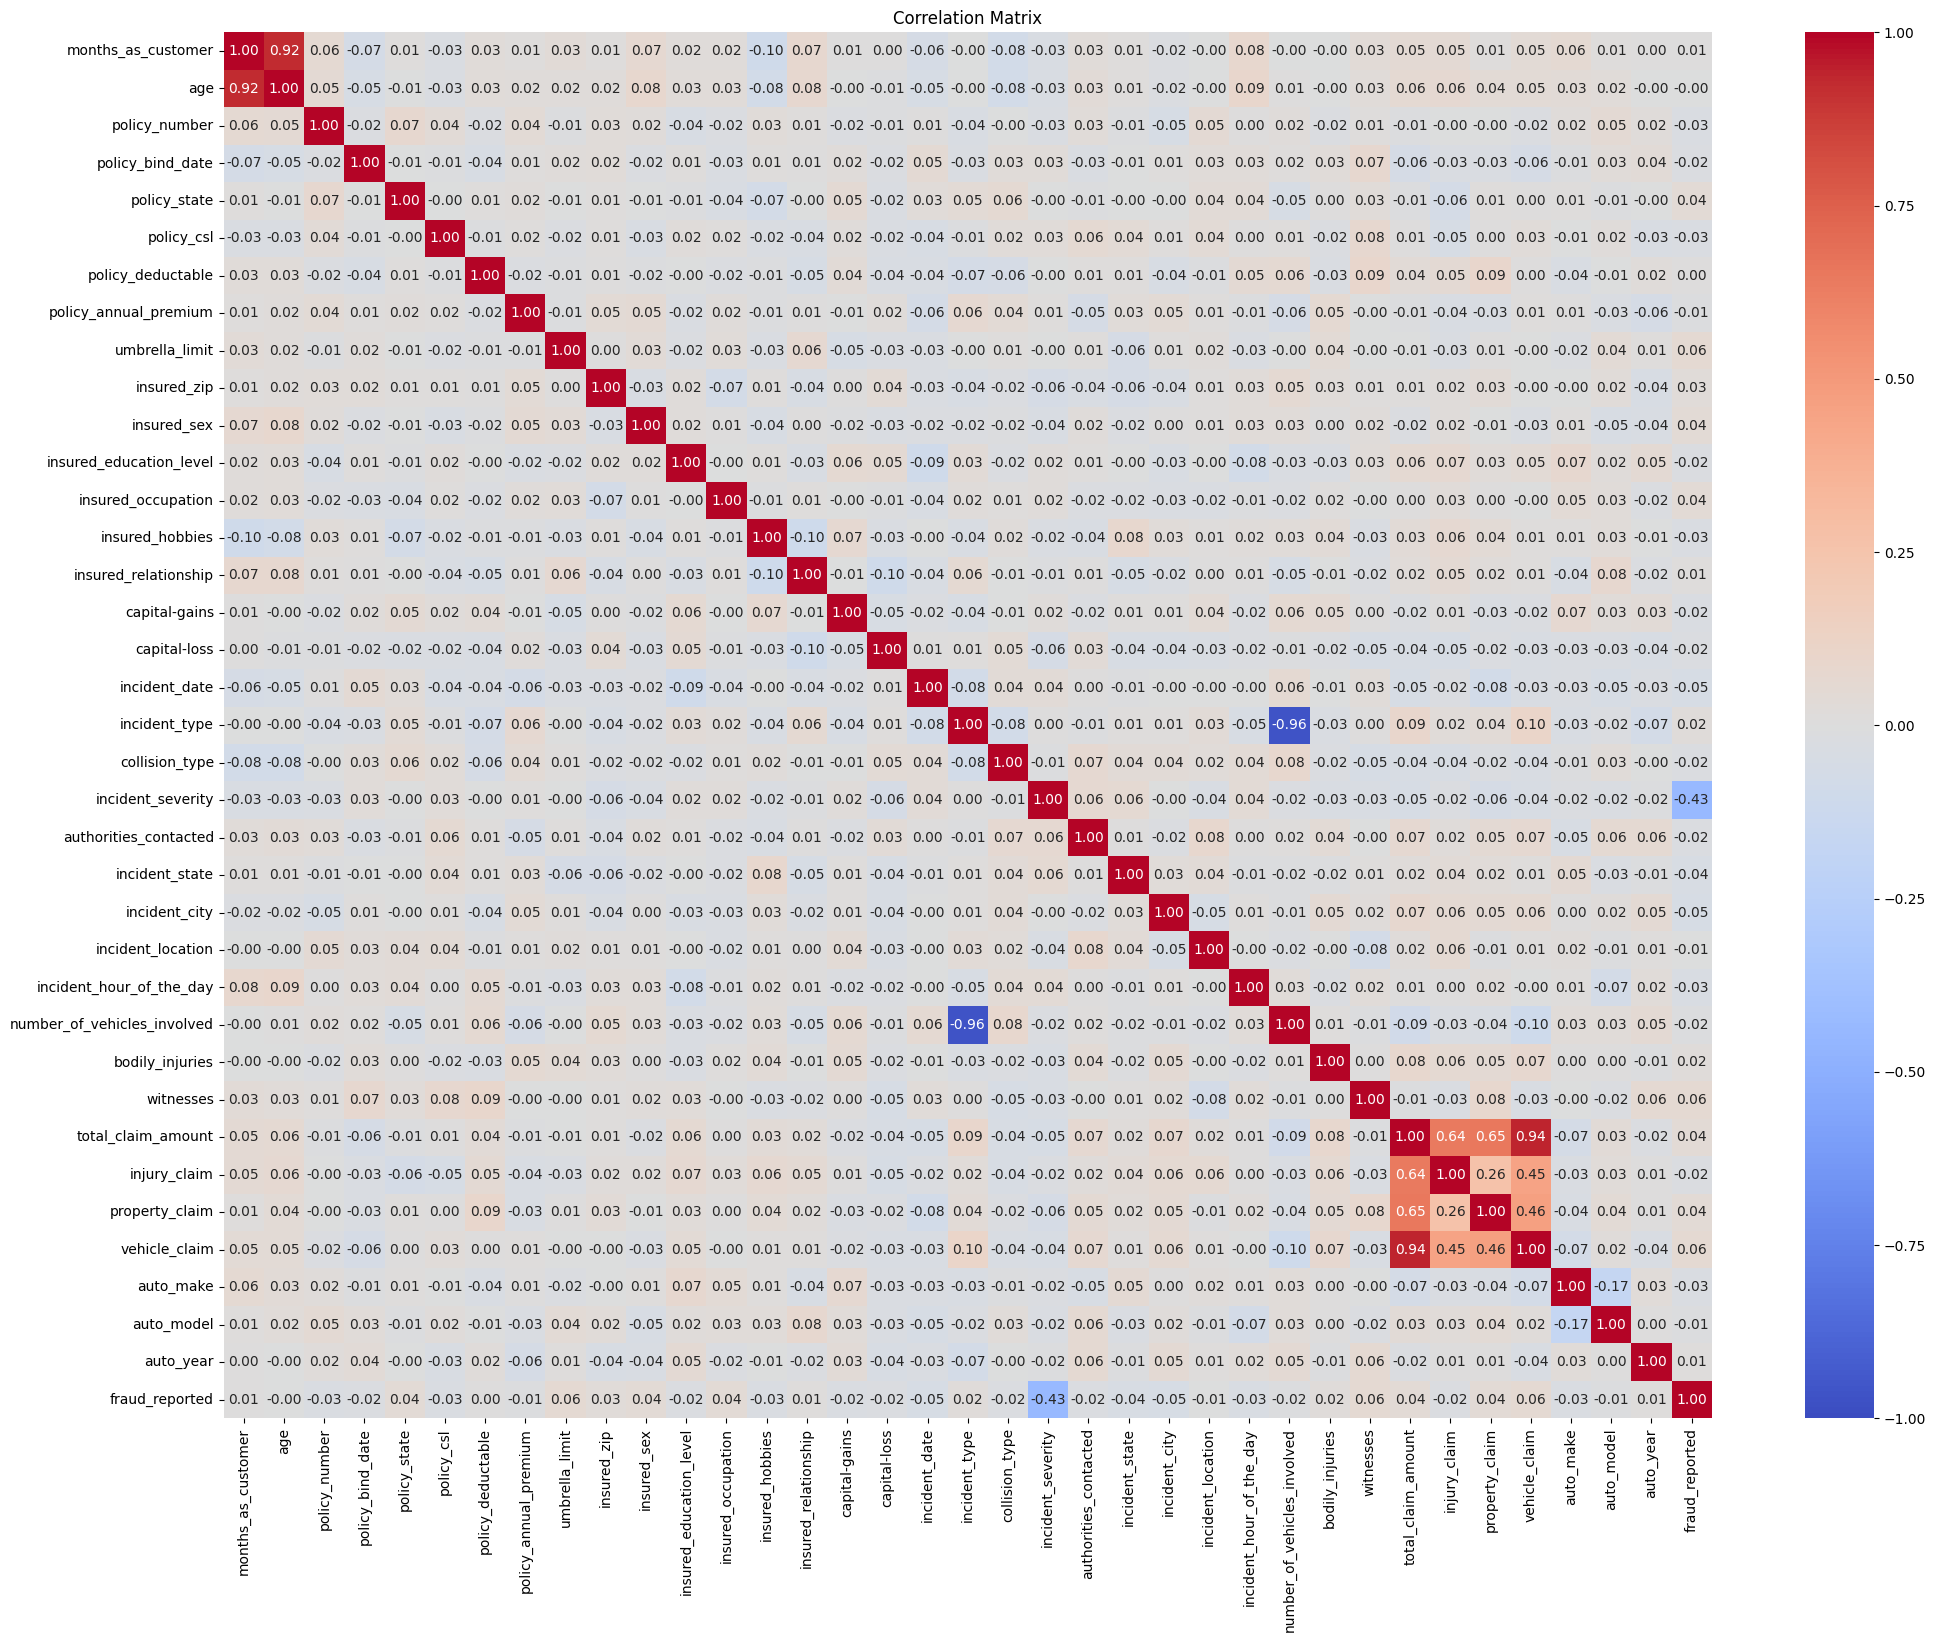

In [7]:
temp = df.select_dtypes(include=[np.number])

plt.figure(figsize=(24, 18))
sns.heatmap(temp.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix')
plt.show()

Train Decision Tree


In [8]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       114
           1       0.65      0.55      0.60        51

    accuracy                           0.77       165
   macro avg       0.73      0.71      0.72       165
weighted avg       0.76      0.77      0.76       165



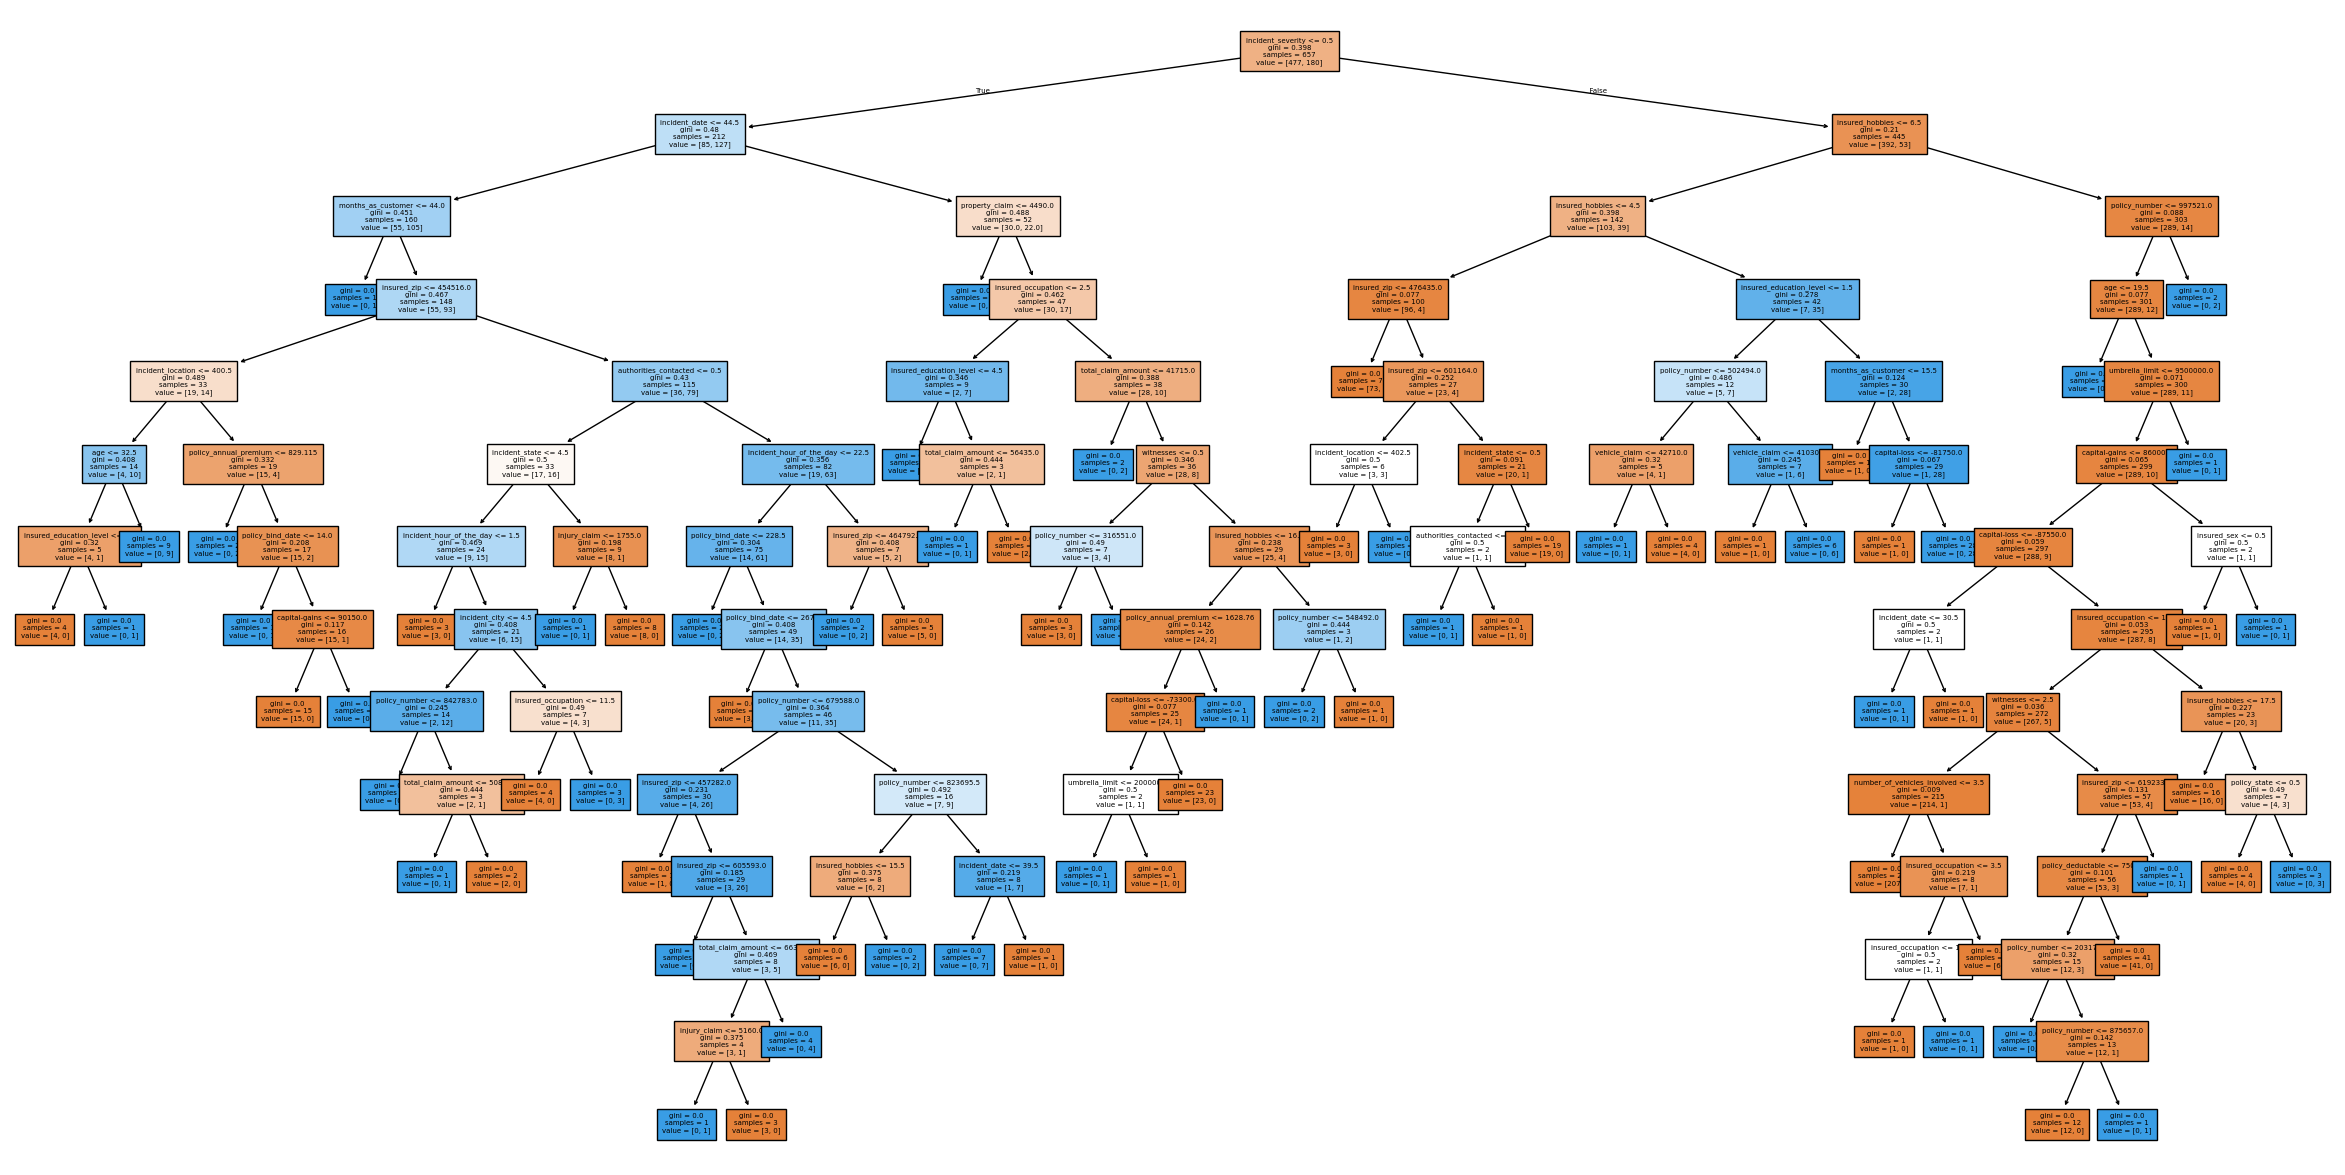

In [9]:
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

plt.figure(figsize=(30,15))
plot_tree(decision_tree, feature_names=X.columns, filled=True, fontsize=5)
plt.show()

Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='f1', cv=5)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best F1 Score for Random Forest: {best_score_rf}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 Score for Random Forest: 0.4581089268826325


In [11]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Dự đoán và đánh giá Random Forest
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Tính Feature Importances cho Random Forest
importances = random_forest.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)


Random Forest Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       114
           1       0.58      0.35      0.44        51

    accuracy                           0.72       165
   macro avg       0.67      0.62      0.63       165
weighted avg       0.70      0.72      0.70       165



Top 5 Feature Importances:
 incident_severity        0.186886
insured_hobbies          0.073205
insured_zip              0.045448
policy_annual_premium    0.042557
policy_number            0.040110
policy_bind_date         0.038499
dtype: float64


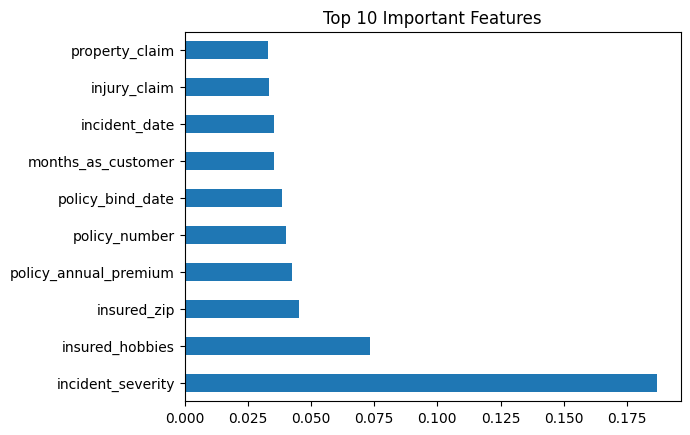

In [13]:
print("Top 5 Feature Importances:\n", feature_importances.head(6))
# Hiển thị biểu đồ Feature Importances
feature_importances.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()